In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy



In [2]:
import tensorflow_datasets as tsdf

d:\work\AIML\Computer_Vision\Computer_vision\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
import matplotlib.pyplot as plt

In [3]:
dataset,info=tsdf.load("malaria",with_info=True, as_supervised=True, shuffle_files=True, split=['train'])

In [4]:
# TRAIN_RATIO=0.8
# VAL_RATIO=0.1
# TEST_RATIO=0.1

# dataset=tf.data.Dataset.range(10)
# print(list(dataset.as_numpy_iterator()))
# DATASET_SIZE=len(dataset)
# train_dataset=dataset.take(int(TRAIN_RATIO*DATASET_SIZE)) 
# print(list(train_dataset.as_numpy_iterator()))

# val_dataset=dataset.skip(int(TRAIN_RATIO*DATASET_SIZE)) 
# print(list(val_dataset.as_numpy_iterator()))

In [5]:
def split(dataset, TRAIN_RATIO,VAL_RATIO, TEST_RATIO):
    DATASET_SIZE=len(dataset)
    
    train_dataset=dataset.take(int(TRAIN_RATIO*DATASET_SIZE))
    
    val_test_dataset=dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
    val_dataset=val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))
    
    test_dataset=val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE))
    return train_dataset, val_dataset, test_dataset

TRAIN_RATIO=0.6
VAL_RATIO=0
TEST_RATIO=0.4

# dataset=tf.data.Dataset.range(10)

train_dataset, val_dataset, test_dataset=split(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()))
print(list(val_dataset.take(1).as_numpy_iterator()))
print(list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0)]
[]
[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
  

# data analysis

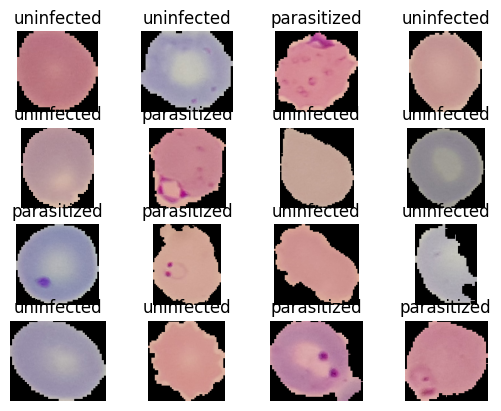

In [6]:
for i ,( image,label) in enumerate(train_dataset.take(16)):
    ax=plt.subplot(4,4,i+1)
    plt.imshow(image)
    plt.title(info.features['label'].int2str(label))
    plt.axis("off")

# data processing

In [7]:
# defining a method resize the image file
size=224
def resize_rescale(image,label):
    #using tensorflow method to resize the image 
    return tf.image.resize(image, (size,size))/255.0,label
    

In [8]:
train_dataset=train_dataset.map(resize_rescale)

In [9]:
val_dataset=train_dataset.map(resize_rescale)

In [10]:
test_dataset=train_dataset.map(resize_rescale)

In [11]:
for image,label in train_dataset.take(1):
    print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [12]:
train_dataset=train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [13]:
val_dataset=val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [14]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [15]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# CNN

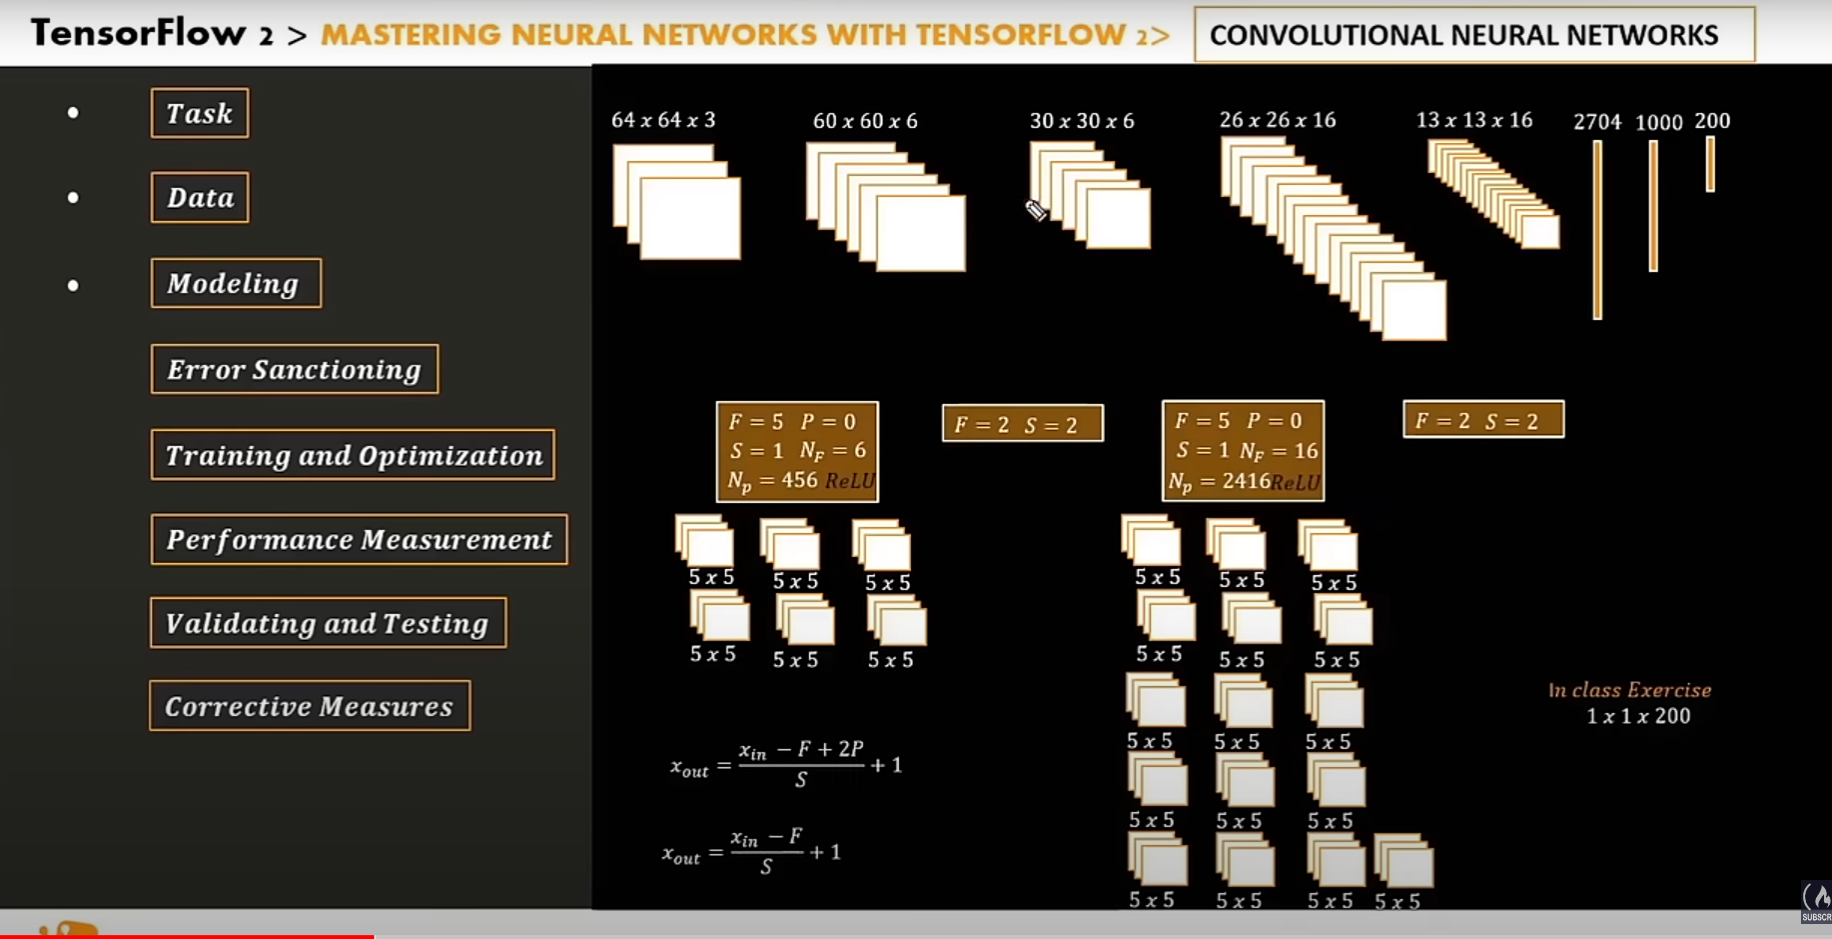

# creating the network

In [16]:
model=tf.keras.Sequential([
    InputLayer(input_shape=(size,size,3)),
    
    Conv2D(filters=6,kernel_size=3,strides=1, padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),
    
    Conv2D(filters=16,kernel_size=3,strides=1, padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),
    
    Flatten(),
    
    Dense(100, activation="relu"),
    BatchNormalization(),
    
    Dense(10, activation="relu"),
    BatchNormalization(),
    
    Dense(1, activation="sigmoid"),
    
    
])

model.summary()

d:\work\AIML\Computer_Vision\Computer_vision\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     4,665,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

# Binary cross Entropy loss

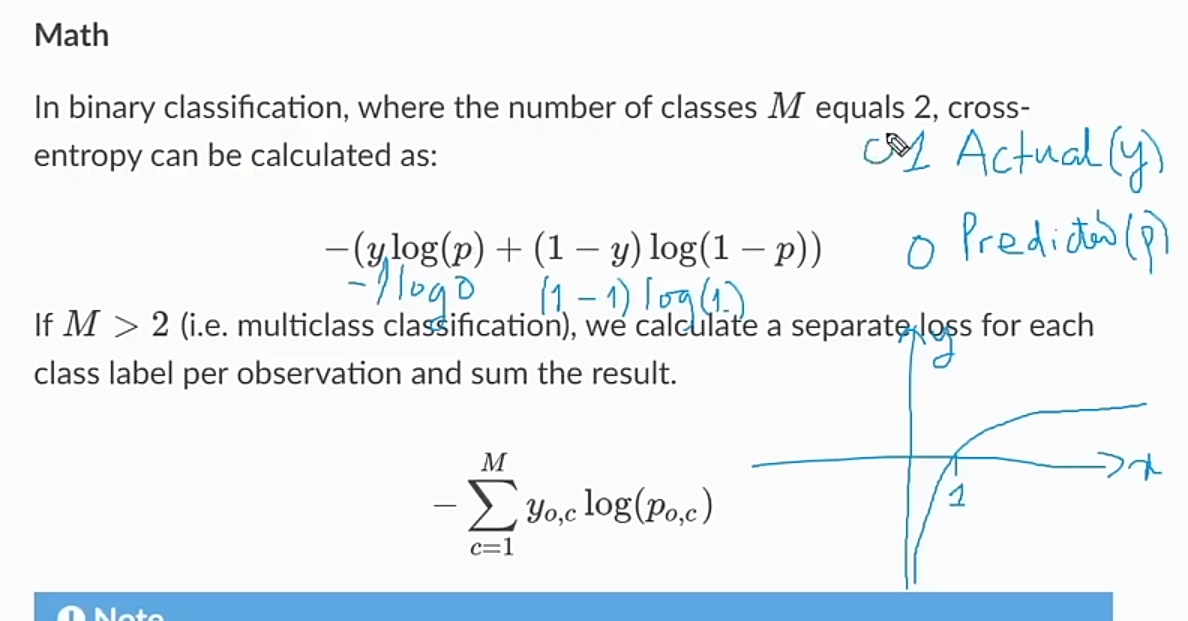

In [17]:
model.compile(optimizer=Adam(learning_rate=0.1), loss=BinaryCrossentropy, metrics=["accuracy"])

In [18]:
print(tf.__version__)

2.16.1


In [19]:
history=model.fit(train_dataset, validation_data=val_dataset, epochs=20, verbose=1)

Epoch 1/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 189s 359ms/step - accuracy: 0.6688 - loss: 0.6081 - val_accuracy: 0.4997 - val_loss: 1.4281
Epoch 2/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 178s 345ms/step - accuracy: 0.9069 - loss: 0.2652 - val_accuracy: 0.5005 - val_loss: 1.0629
Epoch 3/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 187s 362ms/step - accuracy: 0.9304 - loss: 0.2113 - val_accuracy: 0.5004 - val_loss: 0.7183
Epoch 4/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 216s 417ms/step - accuracy: 0.9355 - loss: 0.1989 - val_accuracy: 0.4995 - val_loss: 1.1412
Epoch 5/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 193s 373ms/step - accuracy: 0.9330 - loss: 0.2085 - val_accuracy: 0.5005 - val_loss: 0.7837
Epoch 6/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 206s 398ms/step - accuracy: 0.9427 - loss: 0.1901 - val_accuracy: 0.4995 - val_loss: 0.9222
Epoch 7/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 221s 428ms/step - accuracy: 0.9328 - loss: 0.2016 - val_accuracy: 0.5002 - val_loss: 1.7339
Epoch 8/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 218s 421ms/step - accuracy: 0.9434 -

# data visulization

In [23]:
history.history

{'accuracy': [0.7614007592201233,
  0.9123623967170715,
  0.9304463267326355,
  0.9339542984962463,
  0.9329865574836731,
  0.9368574023246765,
  0.9321398138999939,
  0.9412120580673218,
  0.9456272125244141,
  0.9432079195976257,
  0.949800431728363,
  0.9519777297973633,
  0.9584492444992065,
  0.959477424621582,
  0.9648602604866028,
  0.9620781540870667,
  0.9670376181602478,
  0.974113941192627,
  0.9724204540252686,
  0.9766541719436646],
 'loss': [0.49138617515563965,
  0.25512582063674927,
  0.21523679792881012,
  0.20658542215824127,
  0.21228347718715668,
  0.20328696072101593,
  0.20114997029304504,
  0.174204021692276,
  0.16386468708515167,
  0.16557420790195465,
  0.15171168744564056,
  0.1423873007297516,
  0.12827865779399872,
  0.11800196021795273,
  0.10685449093580246,
  0.10962968319654465,
  0.09879615902900696,
  0.07955503463745117,
  0.08298712968826294,
  0.06505457311868668],
 'val_accuracy': [0.49969759583473206,
  0.5004838705062866,
  0.5004233717918396,
 

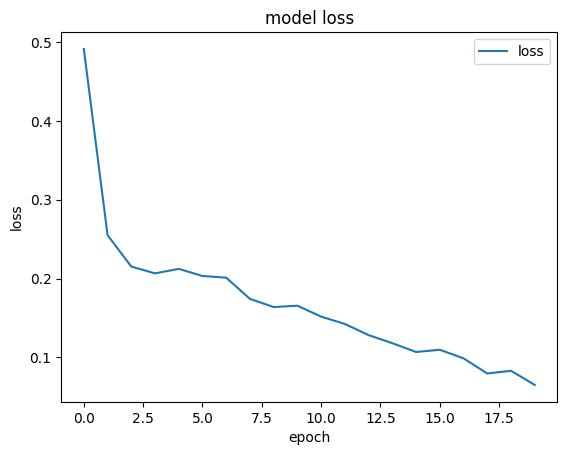

In [28]:
#8:20:00

plt.plot(history.history["loss"])
# plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel('epoch')
plt.legend(["loss","val_loss"])


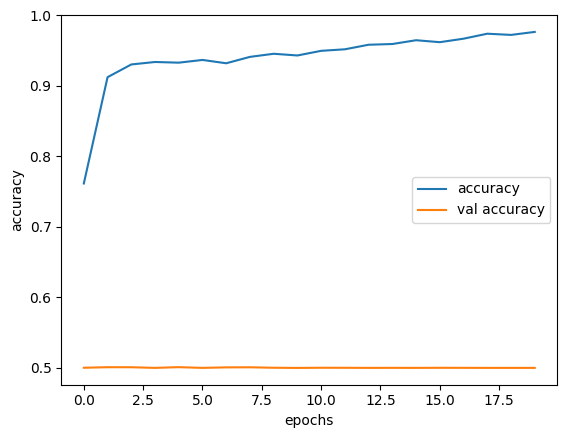

In [26]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", "val accuracy"])
plt.show()